# Atividade 01 - Parte 01 - Inventário de emissões utilizando Python

Aluno: José Henrique Hess

## Abrir planilha de fatores de emissões compilada.
Utilizei o capítulo 11.7 da AP42, pois meu empreendimento é uma cimenteira. \
Link:

In [71]:
# Utilizando Pandas para abrir a planilha
import pandas as pd
import os

# Coletando o caminho da pasta que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'

# Indicando nome do arquivo
chapterNumer = 11
subChapter = 7
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)

# Abrindo o arquivo utilizando o pandas
fe = pd.read_csv(path+ '\\' + file)
print(fe)

chp_11_7.csv
                Source    PM  Lead   SO2   NOX    CO   CO2   VOC    HF  \
0  CRM - Fabric Filter  0.12   1.3  1.60  2.90  0.20  0.12  2.10  1.80   
1                Dryer  2.30   1.4  0.70  0.15  1.27  2.01  0.70  0.45   
2               Cooler  0.11   0.6  0.90  0.25  0.50  0.24  0.26  0.10   
3       Firing-natural  0.20   0.6  0.23  0.54  3.30  0.50  0.43  0.46   

   Fluorides  
0       0.70  
1       0.50  
2       0.70  
3       0.56  


2730.0


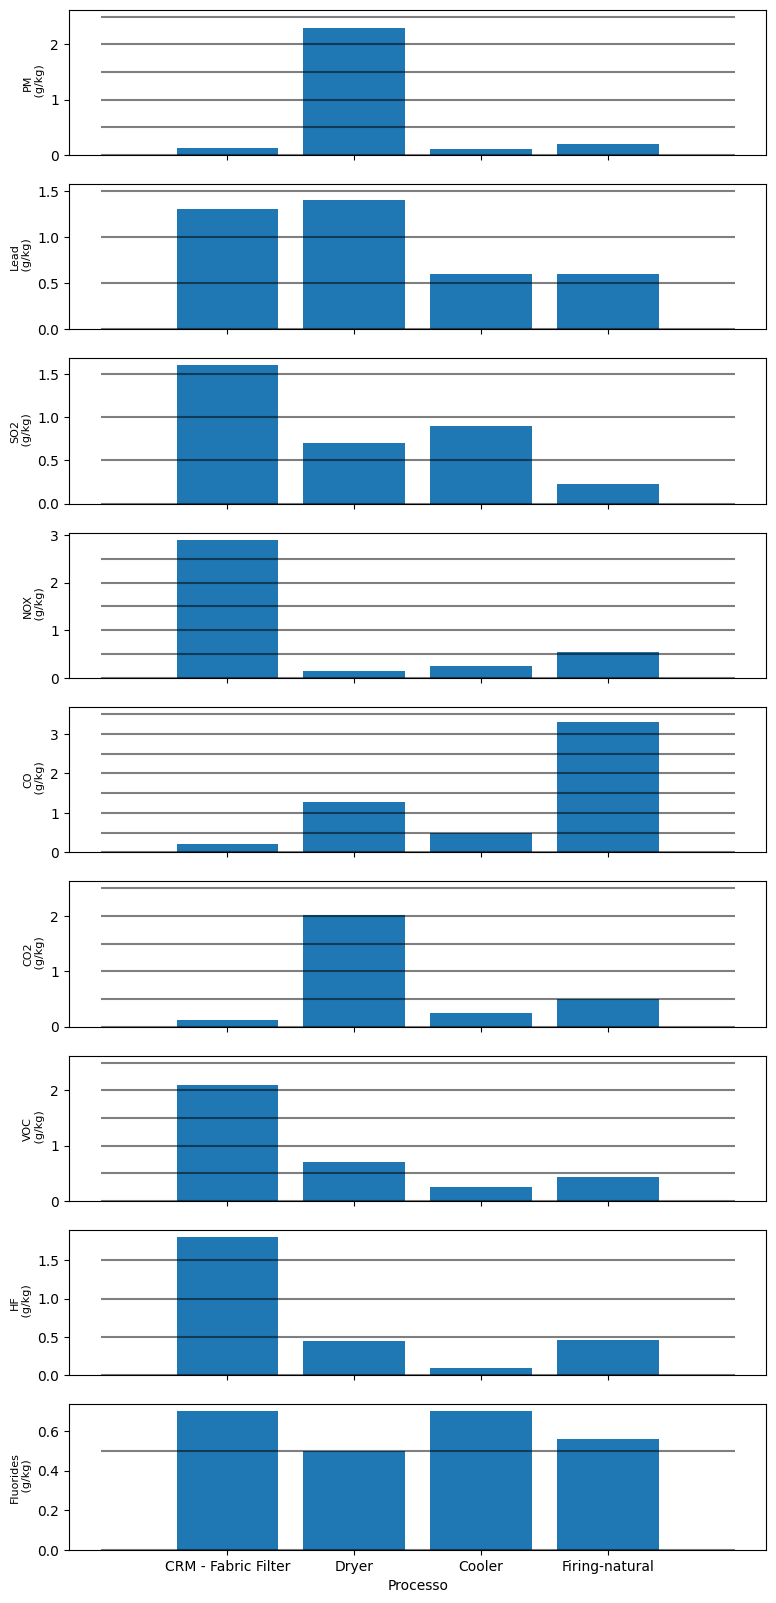

In [103]:
# Plotando os fatores de emissão
import matplotlib.pyplot as plt

atv = 1000 # Considerando uma taxa de atividade
emis = fe['PM']*atv

#Somando dataframe
print(emis.sum())

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# Sharex significa compartilhar eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex=True,figsize=(9,20))

#Loop para preencher o subplot com os gráficos de barra
for ii in range(1,len(fe.columns)):
    ax[ii-1].bar(fe['Source'], fe.iloc[:,ii])
    if ax[8] == ax[ii-1]:
        ax[ii-1].set_xlabel('Processo')
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (g/kg)',fontsize=8)
    
    i=0
    while i <= (0.5+int(max(fe.iloc[:,ii]))):
        if i%0.5 == 0:
            ax[ii-1].hlines(y=i,xmin=-1,xmax=4, alpha=0.5, colors = 'black')
        i = i+0.5

# Salva a figura na pasta figures - criar a pasta antes
fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')

## Criando taxa de aticidade aleatória com sazonalidade
Nesta seção nós criaremos uma taxa de atividade de um empreendimento qualquer que contenha sazonalidade ao longo dos meses do ano. Esta variabilidade também deve conter uma componente aleatória.

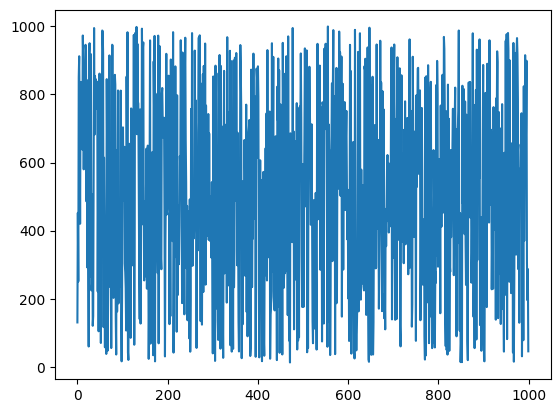

In [115]:
# Criando vetor de valores aleatórios
import numpy as np

atvMax = 1000
atvMin = 12
n = 1000
atv = atvMin + (atvMax-atvMin)*np.random.rand(n)
#print(atv)

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(atv)


In [126]:
# Criar um vetor com as datas
from datetime import datetime, timedelta

# Definindo a data inicial e final
data_inicial = datetime(2024, 1, 1)
data_final = datetime(2024, 12, 31)

# Definindo o passo (intervalo entre as datas)
passo = timedelta(days=1)

# Criando o vetor de datas
vetor_datas = []
data_atual = data_inicial
while data_atual <= data_final:
    vetor_datas.append(data_atual)
    data_atual += passo

# Exibindo o vetor de datas
for data in vetor_datas:
    print(data)

2024-01-01 00:00:00
2024-01-02 00:00:00
2024-01-03 00:00:00
2024-01-04 00:00:00
2024-01-05 00:00:00
2024-01-06 00:00:00
2024-01-07 00:00:00
2024-01-08 00:00:00
2024-01-09 00:00:00
2024-01-10 00:00:00
2024-01-11 00:00:00
2024-01-12 00:00:00
2024-01-13 00:00:00
2024-01-14 00:00:00
2024-01-15 00:00:00
2024-01-16 00:00:00
2024-01-17 00:00:00
2024-01-18 00:00:00
2024-01-19 00:00:00
2024-01-20 00:00:00
2024-01-21 00:00:00
2024-01-22 00:00:00
2024-01-23 00:00:00
2024-01-24 00:00:00
2024-01-25 00:00:00
2024-01-26 00:00:00
2024-01-27 00:00:00
2024-01-28 00:00:00
2024-01-29 00:00:00
2024-01-30 00:00:00
2024-01-31 00:00:00
2024-02-01 00:00:00
2024-02-02 00:00:00
2024-02-03 00:00:00
2024-02-04 00:00:00
2024-02-05 00:00:00
2024-02-06 00:00:00
2024-02-07 00:00:00
2024-02-08 00:00:00
2024-02-09 00:00:00
2024-02-10 00:00:00
2024-02-11 00:00:00
2024-02-12 00:00:00
2024-02-13 00:00:00
2024-02-14 00:00:00
2024-02-15 00:00:00
2024-02-16 00:00:00
2024-02-17 00:00:00
2024-02-18 00:00:00
2024-02-19 00:00:00


In [127]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month

# Mostrar o DataFrame resultante
print(df)

          Data  Mes
0   2024-01-01    1
1   2024-01-02    1
2   2024-01-03    1
3   2024-01-04    1
4   2024-01-05    1
..         ...  ...
361 2024-12-27   12
362 2024-12-28   12
363 2024-12-29   12
364 2024-12-30   12
365 2024-12-31   12

[366 rows x 2 columns]


          Data  Mes   atividade  sazonalidade  aleatorioSazonal
0   2024-01-01    1  148.646994      1.866025        464.040385
1   2024-01-02    1  306.588950      1.866025        590.295743
2   2024-01-03    1  498.125063      1.866025        627.921250
3   2024-01-04    1  886.747355      1.866025        849.718287
4   2024-01-05    1  561.577964      1.866025        154.827606
..         ...  ...         ...           ...               ...
361 2024-12-27   12  186.306476      2.000000        185.363995
362 2024-12-28   12  588.216745      2.000000       1463.291779
363 2024-12-29   12  677.961334      2.000000        709.752640
364 2024-12-30   12  624.371943      2.000000        229.593619
365 2024-12-31   12   72.814737      2.000000       1017.336809

[366 rows x 5 columns]


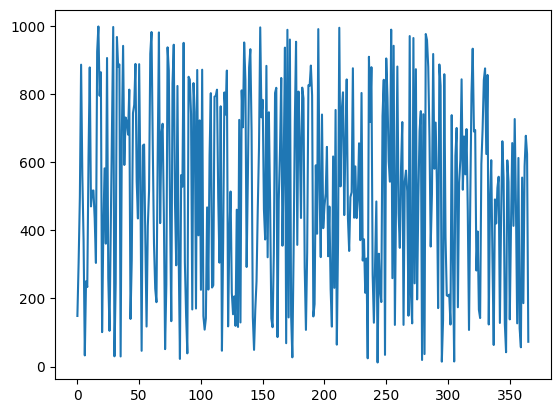

In [131]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
#print(atv)
print(df)
df.to_csv(r"C:\Users\joseh\Documents\GitHub\ENS5173_202401\tabelas\ativ.csv")

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(atv)

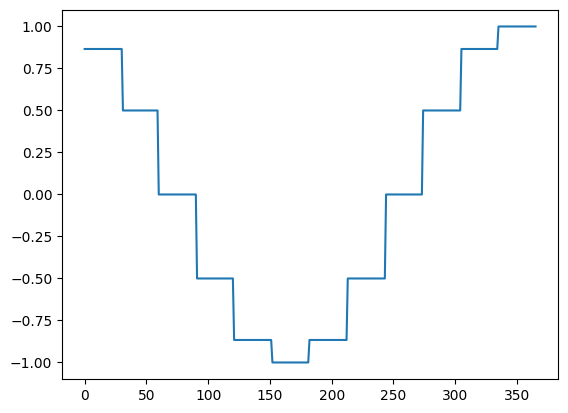

In [132]:
# Criando componente sazonal

sazonalidade = np.cos((2*np.pi)*df['Mes']/12)
plt.plot(sazonalidade)
df['sazonalidade'] = sazonalidade + 1
df.to_csv(r"C:\Users\joseh\Documents\GitHub\ENS5173_202401\tabelas\ativ.csv")

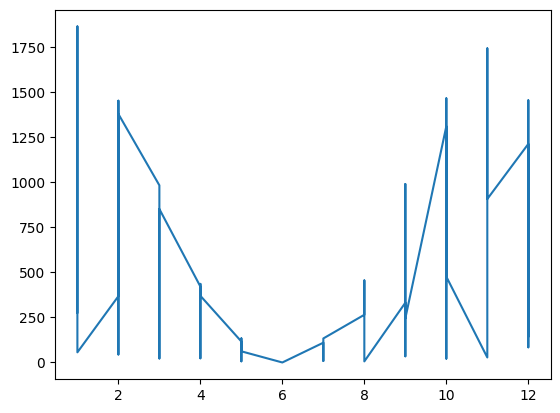

In [133]:
# Valores aleatórios com sazonalidade

df['aleatorioSazonal'] = df['atividade'] * df['sazonalidade'] 

plt.plot(df['Mes'], df['aleatorioSazonal'])